In [1]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('trainv2.csv', delimiter = ',')

print(dataset)

                                                   text  offense_rating
0     TENNESSEE: We're the best state. Nobody even c...            0.20
1     A man inserted an advertisement in the classif...            1.10
2     How many men does it take to open a can of bee...            2.40
3     Told my mom I hit 1200 Twitter followers. She ...            0.00
4     Roses are dead. Love is fake. Weddings are bas...            0.10
...                                                 ...             ...
8995  What do you call a black man on the moon? An a...            1.05
8996  when im picking someone up and they ask how lo...            0.00
8997  A black lesbian, an obese white neck-beard, an...            1.65
8998  and I recognize the need to use ALL of my plat...            0.00
8999  Get married so you can argue about fun things ...            0.10

[9000 rows x 2 columns]


In [ ]:
#===============================================================
#                    NORMAL TOKENIZATION                       #
#===============================================================

In [31]:
# Cleaning and tokenizing the text

import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams


corpus = []


ps = PorterStemmer()
for i in range(0,9000):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    # to lower-case and tokenize
    review = review.lower().split()
    # stemming and stop word removal
    review = ' '.join([ps.stem(w) for w in review if not w in set(stopwords.words('english'))])
    corpus.append(review)

print(corpus)

['tennesse best state nobodi even come close elevennesse walk room tennesse oh shit', 'man insert advertis classifi wife want next day receiv repli read mine free deliveri also avail door step', 'mani men take open beer none open time bring couch', 'told mom hit twitter follow point brother own hous want sever collect agenc oh', 'rose dead love fake wed basic funer cake', 'trabajo spanish word work come latin term trepaliar mean tortur', 'enrol skill train extra curricula activ ad shape weekend work schedul day pass expos blindli love obsess month cool men', 'origin truli one kind also hold glass white wine love laugh', 'men ejacul time month lower risk prostat cancer ejacul four seven time month accord research harvard h chan school public health', 'got realli angri today noth go take word', 'dog mexico name frida save live peopl trap rubbl earthquak identifi total bodi throughout career consid nation heroin offici retir', 'differ mormon man muslim man mormon man get virgin kill', 'st

In [ ]:
#===============================================================
#                    Part Of Speech (POS)                      #
#===============================================================

In [35]:
from nltk import word_tokenize
import re
import nltk
from sklearn.feature_extraction import DictVectorizer
import numpy as np

corpus = []


for i in range(0,100):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    # to lower-case and tokenize
    tokens = word_tokenize(review)
    # stemming and stop word removal
    corpus.append(nltk.pos_tag(tokens))
    
print(corpus)


def extract_features(tagged_sentence, index):
    token, tag = tagged_sentence[index]
    prev_token = ""
    if index > 0:
        prev_token, prev_tag = tagged_sentence[index - 1]
    is_number = False
    try:
        if float(token):
            is_number = True
    except:
        pass
    features_dict = {"token": token, "lower_cased_token": token.lower()
        , "prev_token": prev_token
        , "suffix1": token[-1]
        , "suffix2": token[-2:]
        , "suffix3": token[-3:]
        , "is_capitalized": token.upper() == token
        , "is_number": is_number}
    return features_dict


X_features = np.array([])

for sentence in corpus:
    for k in range(len(sentence)):
        print(extract_features(sentence, k))

vectorizer = DictVectorizer(sparse=False)
X = vectorizer.fit_transform(X_features)
y = dataset.iloc[:,-1].values

print(X.shape, y.shape)

for a in X:
    print(list(a))

print(X.shape, y.shape)

[[('TENNESSEE', 'NNP'), ('We', 'PRP'), ('re', 'VBP'), ('the', 'DT'), ('best', 'JJS'), ('state', 'NN'), ('Nobody', 'NN'), ('even', 'RB'), ('comes', 'VBZ'), ('close', 'JJ'), ('Elevennessee', 'NNP'), ('walks', 'NN'), ('into', 'IN'), ('the', 'DT'), ('room', 'NN'), ('TENNESSEE', 'NNP'), ('Oh', 'NNP'), ('shit', 'VBD')], [('A', 'DT'), ('man', 'NN'), ('inserted', 'VBD'), ('an', 'DT'), ('advertisement', 'NN'), ('in', 'IN'), ('the', 'DT'), ('classifieds', 'NNS'), ('Wife', 'NNP'), ('Wanted', 'VBD'), ('The', 'DT'), ('next', 'JJ'), ('day', 'NN'), ('he', 'PRP'), ('received', 'VBD'), ('of', 'IN'), ('replies', 'NNS'), ('all', 'DT'), ('reading', 'NN'), ('You', 'PRP'), ('can', 'MD'), ('have', 'VB'), ('mine', 'JJ'), ('Free', 'JJ'), ('delivery', 'NN'), ('also', 'RB'), ('available', 'JJ'), ('at', 'IN'), ('your', 'PRP$'), ('door', 'JJ'), ('step', 'NN')], [('How', 'WRB'), ('many', 'JJ'), ('men', 'NNS'), ('does', 'VBZ'), ('it', 'PRP'), ('take', 'VB'), ('to', 'TO'), ('open', 'VB'), ('a', 'DT'), ('can', 'MD'), 

{'token': 'old', 'lower_cased_token': 'old', 'prev_token': 'the', 'suffix1': 'd', 'suffix2': 'ld', 'suffix3': 'old', 'is_capitalized': False, 'is_number': False}
{'token': 'girl', 'lower_cased_token': 'girl', 'prev_token': 'old', 'suffix1': 'l', 'suffix2': 'rl', 'suffix3': 'irl', 'is_capitalized': False, 'is_number': False}
{'token': 'I', 'lower_cased_token': 'i', 'prev_token': '', 'suffix1': 'I', 'suffix2': 'I', 'suffix3': 'I', 'is_capitalized': True, 'is_number': False}
{'token': 'met', 'lower_cased_token': 'met', 'prev_token': 'I', 'suffix1': 't', 'suffix2': 'et', 'suffix3': 'met', 'is_capitalized': False, 'is_number': False}
{'token': 'a', 'lower_cased_token': 'a', 'prev_token': 'met', 'suffix1': 'a', 'suffix2': 'a', 'suffix3': 'a', 'is_capitalized': False, 'is_number': False}
{'token': 'girl', 'lower_cased_token': 'girl', 'prev_token': 'a', 'suffix1': 'l', 'suffix2': 'rl', 'suffix3': 'irl', 'is_capitalized': False, 'is_number': False}
{'token': 'who', 'lower_cased_token': 'who', '

ValueError: Sample sequence X is empty.

In [52]:
#===============================================================
#                                                              #
#                     DATA PRE-PROCESSING                      #
#                                                              #
#===============================================================

In [ ]:
#===============================================================
#                          Bag of Words                        #
#===============================================================

In [28]:
# Create bag-of-words model WITH BIGRAM

from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features = 10000)
X = vectorizer.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
#===============================================================
#                   Bag of Words with Bigram                   #
#===============================================================

In [28]:
# Create bag-of-words model WITH BIGRAM

from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features = 10000, ngram_range = (1,2))
X = vectorizer.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
#===============================================================
#                   Bag of Words with Trigram                   #
#===============================================================

In [28]:
# Create bag-of-words model WITH BIGRAM

from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features = 10000, ngram_range = (1,3))
X = vectorizer.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
#===============================================================
#                               TF-IDF                         #
#===============================================================

In [5]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values


print(vectorizer.get_feature_names())

print(X.shape, y)

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
#===============================================================
#                                                              #
#                    DATA LABELS CLEAN UP                      #
#                                                              #
#===============================================================

In [11]:
# check version number
import imblearn
import collections
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Round offesnive_rating values
import numpy



new_y = numpy.array([])

zeros = 0
uns = 0
dois = 0
tres = 0
quatros = 0
cincos = 0

for i in y:
    if(round(i) == 0):
        new_y = numpy.append(new_y,0)
    elif(round(i) == 1):
        new_y = numpy.append(new_y,1)
    else:
        new_y = numpy.append(new_y,2)

     
    
#over = SMOTE({0:6483,1:3000,2:3000})
#under = RandomUnderSampler({0: 3000, 1: 3000, 2: 3000})
#X, new_y = over.fit_resample(X, new_y)
#X, new_y = under.fit_resample(X, new_y)

print(imblearn.__version__)

counter = collections.Counter(new_y)
print(counter)


        
for i in list(new_y):
    if i == 0:
        zeros+=1
    elif i == 1:
        uns+=1
    else:
        dois +=1   


#for i in new_y:
#    if i <= 0:
#        zeros+=1
#    elif i <= 1:
#        uns +=1
#    elif i <= 2:
#        dois +=1
#    elif i <= 3:
#        tres +=1
#    elif i <= 4:
#        quatros +=1
#    else:
#        cincos+=1
        
print("Number of zeros: ", zeros)
print("Number of ones: ", uns)
print("Number of twos: ", dois)
print("Number of threes: ", tres)
print("Number of fours: ", quatros)
print("Number of fives: ", cincos)

0.8.0
Counter({0.0: 6483, 2.0: 1329, 1.0: 1188})
Number of zeros:  6483
Number of ones:  1188
Number of twos:  1329
Number of threes:  0
Number of fours:  0
Number of fives:  0


In [13]:
# Split dataset into training and test sets

from sklearn.model_selection import train_test_split
 
percentage = 0.15
aux = percentage*len(new_y)

x_temp, x_test, y_temp, y_test = train_test_split(X, new_y, test_size = percentage, random_state = 0)
x_train, x_dev, y_train, y_dev = train_test_split(x_temp, y_temp, test_size = aux/(len(new_y)-aux), random_state = 0)

#x_train = x_train.astype(int)
#y_train = y_train.astype(int)
#x_test = x_test.astype(int)
#y_test = y_test.astype(int)
#x_dev = x_dev.astype(int)
#y_dev = y_dev.astype(int)
print(x_train.shape, y_train.shape)
print(x_train)
print(x_test.shape, y_test.shape)
print(x_test)
print(x_dev.shape, y_dev.shape)
print(x_dev)

ValueError: Found input variables with inconsistent numbers of samples: [21523, 9000]

In [51]:
#===============================================================
#                                                              #
#                        CLASSIFIERS                           #
#                                                              #
#===============================================================

In [ ]:
#===============================================================
#                        Logistic Regression                   #
#===============================================================

In [12]:
# Logistic Regression for Test

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000, penalty="l2")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

NameError: name 'x_train' is not defined

Accuracy:  0.8140740740740741
Precision:  [0.8        0.79411765 0.84821429]
Recall:  [0.84988453 0.76470588 0.82969432]
F1:  [0.82418813 0.7791343  0.8388521 ]


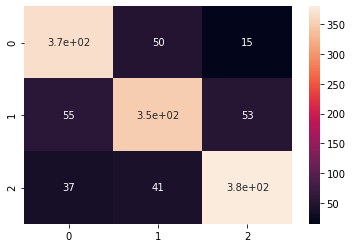

In [39]:
# Logistic Regression Stats for Test 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# print(confusion_matrix(y_test, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))

In [42]:
# Logistic Regression for Dev

y_pred = classifier.predict(x_dev)

In [43]:
# Logistic Regression Stats for Dev

print(confusion_matrix(y_dev, y_pred))
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None, labels=numpy.unique(y_pred)))

[[367  62  20]
 [ 58 348  49]
 [ 32  41 373]]
Accuracy:  0.8059259259259259
Precision:  [0.80306346 0.77161863 0.8438914 ]
Recall:  [0.81737194 0.76483516 0.83632287]
F1:  [0.81015453 0.76821192 0.84009009]


In [53]:
#===============================================================
#                              SVM                             #
#===============================================================

In [45]:
# Test

from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [46]:
# Stats for Test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


print(confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None, labels=numpy.unique(y_pred)))

[[424   4   5]
 [104 346   9]
 [ 62  12 384]]
Accuracy:  0.8548148148148148
Precision:  [0.71864407 0.9558011  0.96482412]
Recall:  [0.97921478 0.75381264 0.83842795]
F1:  [0.82893451 0.84287454 0.89719626]


In [47]:
# Dev

y_pred = classifier.predict(x_dev)

In [49]:
# Stats for Dev

print(confusion_matrix(y_dev, y_pred))
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None, labels=numpy.unique(y_pred)))

[[437   7   5]
 [104 341  10]
 [ 54  11 381]]
Accuracy:  0.8585185185185186
Precision:  [0.73445378 0.94986072 0.96212121]
Recall:  [0.97327394 0.74945055 0.85426009]
F1:  [0.83716475 0.83783784 0.90498812]


In [ ]:
#===============================================================
#                        Decision Tree                         #
#===============================================================

In [54]:
# Test

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Accuracy:  0.7340740740740741
Precision:  [0.74444444 0.69907407 0.75641026]
Recall:  [0.77367206 0.65795207 0.77292576]
F1:  [0.7587769  0.67789001 0.76457883]


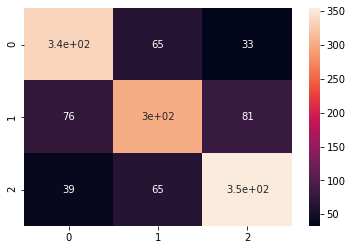

In [55]:
# Stats for Test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# print(confusion_matrix(y_test, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))

In [56]:
# Dev

y_pred = classifier.predict(x_dev)

Accuracy:  0.7237037037037037
Precision:  [0.73542601 0.67678959 0.76072235]
Recall:  [0.73051225 0.68571429 0.75560538]
F1:  [0.73296089 0.68122271 0.75815523]


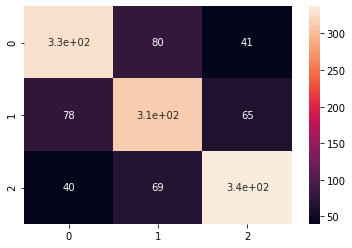

In [57]:
# Stats for Dev
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# print(confusion_matrix(y_test, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None))

In [53]:
#===============================================================
#                       Random Forest                          #
#===============================================================

In [59]:
# Test

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Accuracy:  0.8481481481481481
Precision:  [0.77955912 0.94369973 0.84518828]
Recall:  [0.89838337 0.76688453 0.88209607]
F1:  [0.83476395 0.84615385 0.86324786]


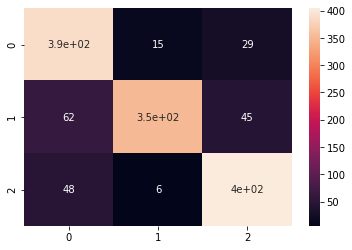

In [60]:
# Stats for Test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# print(confusion_matrix(y_test, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))

In [62]:
# Dev

from sklearn.ensemble import RandomForestClassifier

y_pred = classifier.predict(x_dev)

Accuracy:  0.8511111111111112
Precision:  [0.80324544 0.94339623 0.82921811]
Recall:  [0.88195991 0.76923077 0.90358744]
F1:  [0.84076433 0.84745763 0.86480687]


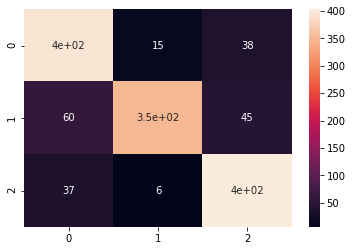

In [63]:
# Stats for Test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# print(confusion_matrix(y_test, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None))

In [ ]:
#===============================================================
#                   MLP (Neural Network)                       #
#===============================================================

In [7]:
# Test

from sklearn.neural_network import MLPClassifier

#import warnings
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
#from sklearn import datasets
#from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
#params = [{'solver': 'sgd', 'activation': 'relu'},
#          {'solver': 'adam', 'activation': 'relu'},
#          {'solver': 'sgd', 'activation': 'tanh'},
#          {'solver': 'adam', 'activation': 'tanh'},
#          {'solver': 'sgd', 'activation': 'identity'},
#          {'solver': 'adam', 'activation': 'identity'},
#          {'solver': 'sgd', 'activation': 'logistic'},
#          {'solver': 'adam', 'activation': 'logistic'}]

#labels = ["sgd with relu", "adam with relu",
#          "sgd with tanh", "adam with tanh",
#          "sgd with identity", "adam with identity",
#          "sgd with logistic", "adam with logistic"]

#plot_args = [{'c': 'red', 'linestyle': '-'},
#             {'c': 'green', 'linestyle': '-'},
#             {'c': 'red', 'linestyle': '--'},
#             {'c': 'green', 'linestyle': '--'},
#             {'c': 'red', 'linestyle': '-.'},
#             {'c': 'green', 'linestyle': '-.'},
#             {'c': 'red', 'linestyle': ':'},
#             {'c': 'green', 'linestyle': ':'}]


#def plot_on_dataset(X, y, ax, name):
#    # for each dataset, plot learning for each learning strategy
#    print("\nlearning on dataset %s" % name)
#    ax.set_title(name)

#    mlps = []
#    max_iter = 500
        
#    for label, param in zip(labels, params):
#        print("training: %s" % label)
#        mlp = MLPClassifier(random_state=0,
#                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
#        with warnings.catch_warnings():
#            warnings.filterwarnings("ignore", category=ConvergenceWarning,
#                                    module="sklearn")
#            mlp.fit(x_train, y_train)

#        mlps.append(mlp)
#        print("Training set score: %f" % mlp.score(X, y))
#        print("Training set loss: %f" % mlp.loss_)
#    for mlp, label, args in zip(mlps, labels, plot_args):
#        ax.plot(mlp.loss_curve_, label=label, **args)



#fig, axes = plt.subplots(2, 1, figsize=(15, 10))
## load / generate some toy datasets
#iris = datasets.load_iris()
#data_sets = [(iris.data, iris.target)]

#for ax, data, name in zip(axes.ravel(), data_sets, ['MLP learning curve']):
#    plot_on_dataset(*data, ax=ax, name=name)

#fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
#plt.show()


classifier = MLPClassifier(max_iter=500, alpha=1e-5, random_state=1, early_stopping=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Accuracy:  0.8355555555555556
Precision:  [0.84278351 0.79051383 0.87938596]
Recall:  [0.7551963  0.87145969 0.87554585]
F1:  [0.79658952 0.82901554 0.87746171]


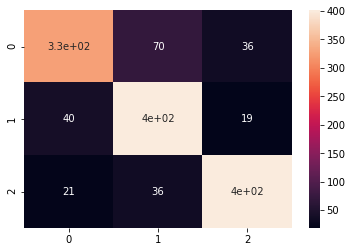

In [8]:
# Stats for Test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# print(confusion_matrix(y_test, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))

In [75]:
# Dev

from sklearn.neural_network import MLPClassifier

y_pred = classifier.predict(x_dev)

Accuracy:  0.8562962962962963
Precision:  [0.89124668 0.80896686 0.88043478]
Recall:  [0.74832962 0.91208791 0.90807175]
F1:  [0.81355932 0.85743802 0.89403974]


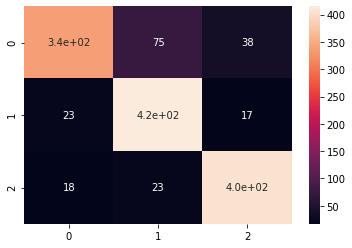

In [76]:
# Stats for Dev
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# print(confusion_matrix(y_test, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None))